In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's generate some simple data to perform SGD and GD on linear regression
N = 1000
D = 2
X = np.random.randn(N, D)
X_test = np.random.randn(N, D)
X[:, 0] *= 5
X[:, 1] *= 8
X_test[:, 0] *= 5
X_test[:, 1] *= 8

# Let's state w = [1, 1] as the true linear model 
w = np.array([1, 1])

# There is noise from N(0, 1) added to all the outputs
y = np.dot(X, w) + np.random.randn(N)
y_test = np.dot(X_test, w) + np.random.randn(N)

In [3]:
# Just to plot the contour curves for all values of w
w1s, w2s = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
Z = np.mean((np.dot(np.c_[w1s.ravel(), w2s.ravel()], X.T) - y)**2, axis=1).reshape(w1s.shape)

In [4]:
def MSE(w, X, y):
    return np.mean((np.dot(X, w) - y)**2)

def gradMSE(w, X, y):
    N = X.shape[0]
    return 2 * (np.dot(np.dot(X.T, X), w) - np.dot(X.T, y))/N

def GD(w_0, eta, n_iters, train_data, test_data, stochastic=False):
    np.random.seed(1234)
    X, y = train_data
    X_test, y_test = test_data
    N = X.shape[0]
    
    path = np.zeros([n_iters, len(w_0)])
    tst_errs = np.zeros([n_iters])
    
    w = np.array(w_0)
    
    for t  in range(n_iters):
        path[t] = w
        tst_errs[t] = MSE(w, X_test, y_test)
        # Update
        g = np.zeros(w.shape)
        if stochastic is True:
            idx = np.random.choice(N)
            g = gradMSE(w, X[idx, np.newaxis], y[idx, np.newaxis])
        else:
            g = gradMSE(w, X, y)
        w = w - eta * g
        
    return path, tst_errs

In [5]:
# Compute paths and test errors for SGD and GD
w_0 = np.array([-2, -3])
eta = 0.002
n_iters = 40
sgd_path, sgd_tst_errs = GD(w_0, eta, n_iters, (X, y), (X_test, y_test), stochastic=True)
gd_path, gd_tst_errs = GD(w_0, eta, n_iters, (X, y), (X_test, y_test))

<IPython.core.display.Javascript object>


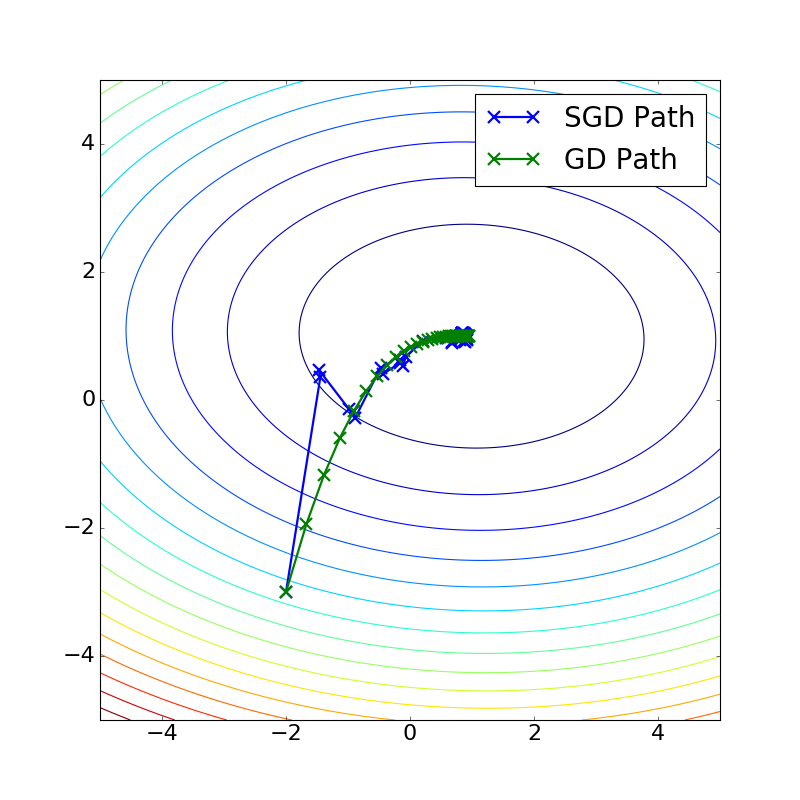

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.contour(w1s, w2s, Z, 20)
ax.plot(sgd_path[:, 0], sgd_path[:, 1], marker='x', markeredgewidth=2, markersize=10, lw=2, label='SGD Path')
ax.plot(gd_path[:, 0], gd_path[:, 1], marker='x', markeredgewidth=2, markersize=10, lw=2, label='GD Path')
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='upper right', fontsize=25)

<IPython.core.display.Javascript object>


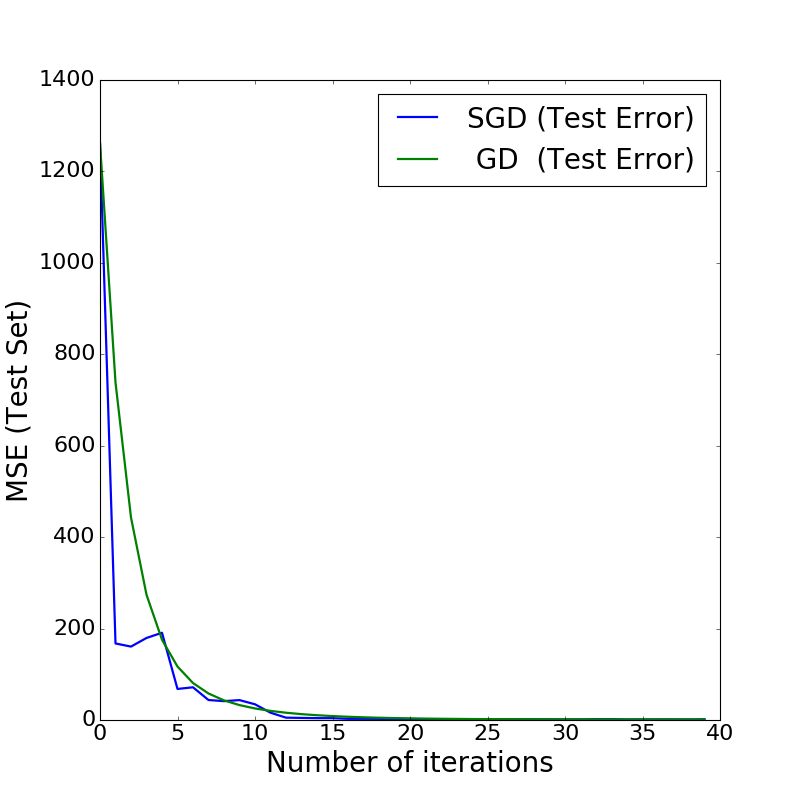

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(sgd_tst_errs,label='SGD (Test Error)', lw=2)
ax.plot(gd_tst_errs, label=' GD  (Test Error)', lw=2)
ax.set_xlabel('Number of iterations', fontsize=25)
ax.set_ylabel('MSE (Test Set)', fontsize=25)
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='upper right', fontsize=25)